### Car Price Analysis

Analyzing Comparis data from 13.01.2023. The data was scraped with 8 car brands.

In [39]:
import pandas as pd
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import kaleido
from scipy import stats

In [28]:
#scraped data from comparis
df=pd.read_excel("C:\\Users\\sewin\\Documents\\Python Datasets\\autocomparis.xlsx")
df

,Brand,Model,Spec,Transmission,Fuel,Canton,Price
0,Porsche,Carrera911,Carrera,Automat,Benzin,SZ,157000
1,Porsche,Macan,Macan,Automat,Benzin,ZG,97300
2,Porsche,Macan,Macan,Automat,Benzin,ZG,93400
3,Porsche,Taycan,Taycan 4 Cross Turismo,Automat,Elektro,ZH,105000
4,Porsche,Cayenne,Cayenne Turbo Coupe,Automat,Benzin,GE,161730
...,...,...,...,...,...,...,...
5817,Mercedes-Benz,B200,B200 Night Star,Automat,Benzin,ZH,53370
5818,Mercedes-Benz,Sprinter,Sprinter 315 CDI FWD,Manuell,Diesel,SZ,39900
5819,Mercedes-Benz,GLE400,GLE400 dAMG Line 4Matic,Automat,Diesel,LU,111500
5820,Mercedes-Benz,GLC220,GLCCoupe 220dAMGLine 4M,Automat,Diesel,LU,85100


In [30]:
#restricting dataset to delete outliers (3 outliers)
df=df[df.Price<400000]
df.shape

(5819, 7)

In [ ]:
#overview of price by brand and how many there are. 
#Porsche has a very high mean price and the lowest amount of listings.
df.groupby('Brand').describe()

Price                                                           \
               count           mean           std      min      25%       50%   
Brand                                                                           
Audi           687.0   78515.513828  36009.346015  26400.0  54790.0   70250.0   
BMW            944.0   93857.842161  35379.008122  29800.0  68900.0   87300.0   
Ford           877.0   48205.497149  16771.143193  18900.0  34450.0   46500.0   
Mercedes-Benz  954.0   99748.006289  53370.389937  28900.0  65800.0   83500.0   
Porsche         88.0  166765.556818  80851.231930  81800.0  91995.0  143980.0   
Skoda          723.0   45437.918396  13451.358383  18350.0  33550.0   45990.0   
Toyota         656.0   41105.346037  13000.178683  18850.0  31350.0   38650.0   
VW             890.0   55449.464045  20514.412599  19300.0  38900.0   53875.0   

                                   
                    75%       max  
Brand                              
Audi            92695.0  344900.0  
BMW            109900.0  279900.0  
Ford            59900.0  143900.0  
Mercedes-Benz  115880.0  399999.0  
Porsche        239670.0  343000.0  
Skoda           55775.0   80000.0  
Toyota          46925.0   88490.0  
VW              69711.5  149500.0

In [35]:
#joining another dataset to get the regions by canton into the original dataset
region=pd.read_excel("C:\\Users\\sewin\\Documents\\Python Datasets\\SchweizRegionen.xlsx",index_col='Kurz')
df=df.join(region, on='Canton')
df

,Brand,Model,Spec,Transmission,Fuel,Canton,Price,Lang,Region
0,Porsche,Carrera911,Carrera,Automat,Benzin,SZ,157000,Schwyz,Zentralschweiz
1,Porsche,Macan,Macan,Automat,Benzin,ZG,97300,Zug,Zentralschweiz
2,Porsche,Macan,Macan,Automat,Benzin,ZG,93400,Zug,Zentralschweiz
3,Porsche,Taycan,Taycan 4 Cross Turismo,Automat,Elektro,ZH,105000,Zürich,Zürich
4,Porsche,Cayenne,Cayenne Turbo Coupe,Automat,Benzin,GE,161730,Genf,Lemanique
...,...,...,...,...,...,...,...,...,...
5817,Mercedes-Benz,B200,B200 Night Star,Automat,Benzin,ZH,53370,Zürich,Zürich
5818,Mercedes-Benz,Sprinter,Sprinter 315 CDI FWD,Manuell,Diesel,SZ,39900,Schwyz,Zentralschweiz
5819,Mercedes-Benz,GLE400,GLE400 dAMG Line 4Matic,Automat,Diesel,LU,111500,Luzern,Zentralschweiz
5820,Mercedes-Benz,GLC220,GLCCoupe 220dAMGLine 4M,Automat,Diesel,LU,85100,Luzern,Zentralschweiz


### Price Distribution per Brand

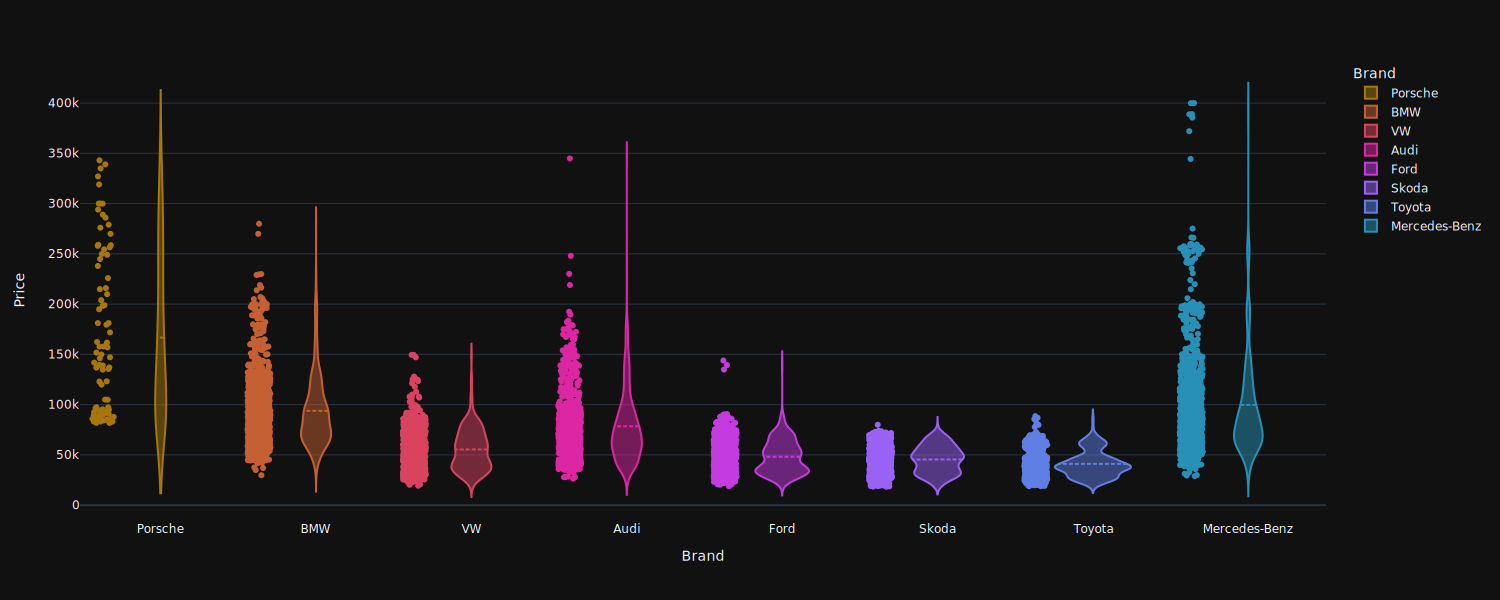

In [31]:
fig=px.violin(df, 'Brand','Price', points='all', color='Brand', color_discrete_sequence=px.colors.cyclical.Phase, template='plotly_dark', width=1500, height=600).update_traces(meanline_visible=True)
fig.show('svg')

- Porsche has listing in a wide range. Its pretty evenly distributed with a concentration at the 95K mark.
- Skoda and Toyota are a t the lower end. Toyota has relatively more listing in cheaper categories. Ford and VW are present in the entry segment as well but also offer more mid-segment options.
- Mercedes has the most listings at 75K and plenty of offers above that. Their average price is 99K. Audi is a bit less premium with a lower average sales price.
- BMW looks similar to Mercedes. Makes sense considering their pin-to-pin positioning.

Price Distribution by Fuel Type

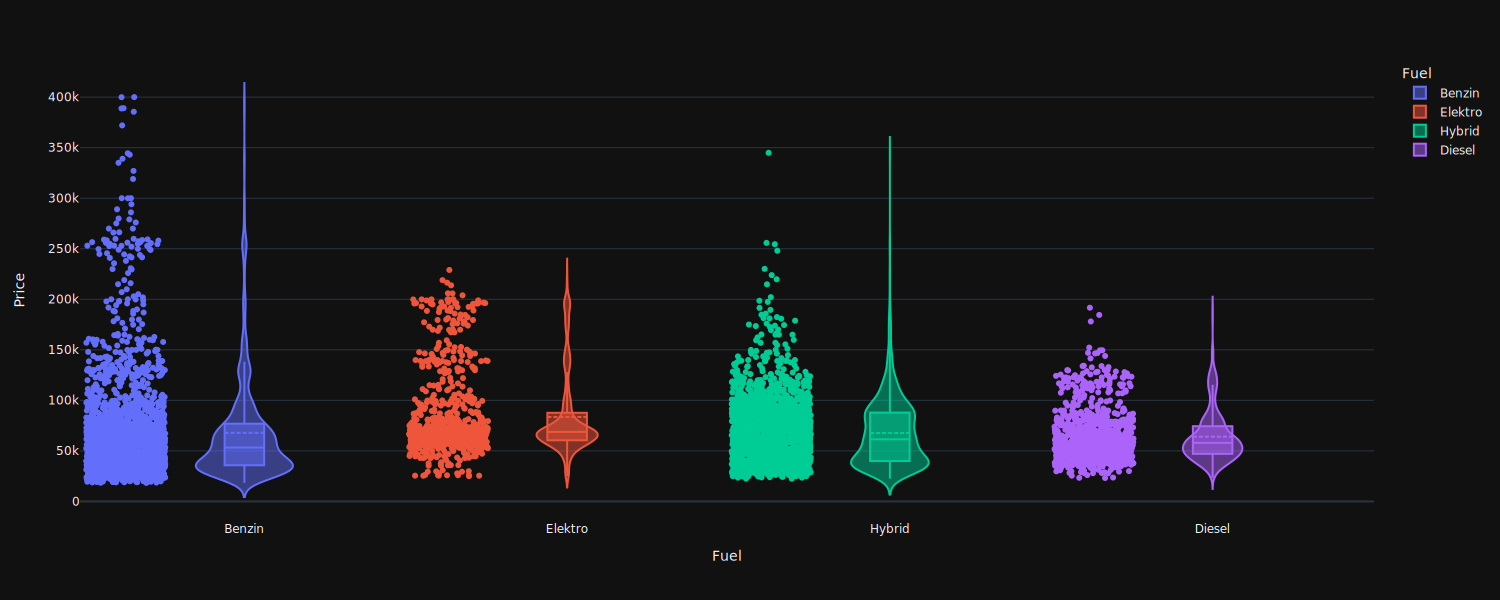

In [32]:
fig=px.violin(df, 'Fuel', 'Price', points='all', box=True, color='Fuel', template='plotly_dark', width=1500, height=600).update_traces( scalemode='count', jitter=0.5,meanline_visible=True)
fig.show('svg')

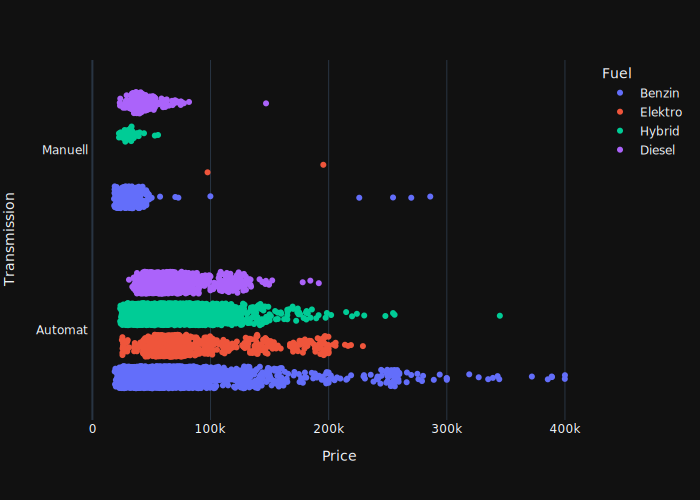

In [33]:
#many more offerings are available for automatic transmissions than for manuals.
fig=px.strip(df,'Price','Transmission',color='Fuel', template='plotly_dark').update_traces(orientation='h', jitter=1)
fig.show('svg')

In [12]:
#which cars are manual and electro
df2=df[(df.Transmission=='Manuell') & (df.Fuel=='Elektro')]
df2

,Brand,Model,Spec,Transmission,Fuel,Canton,Price,Lang,Region
5578,Mercedes-Benz,EQS580,EQS580 4Matic,Manuell,Elektro,SG,195500,St. Gallen,Ostschweiz
5808,Mercedes-Benz,EQC400,EQC400AMG Line 4Matic,Manuell,Elektro,SG,97500,St. Gallen,Ostschweiz


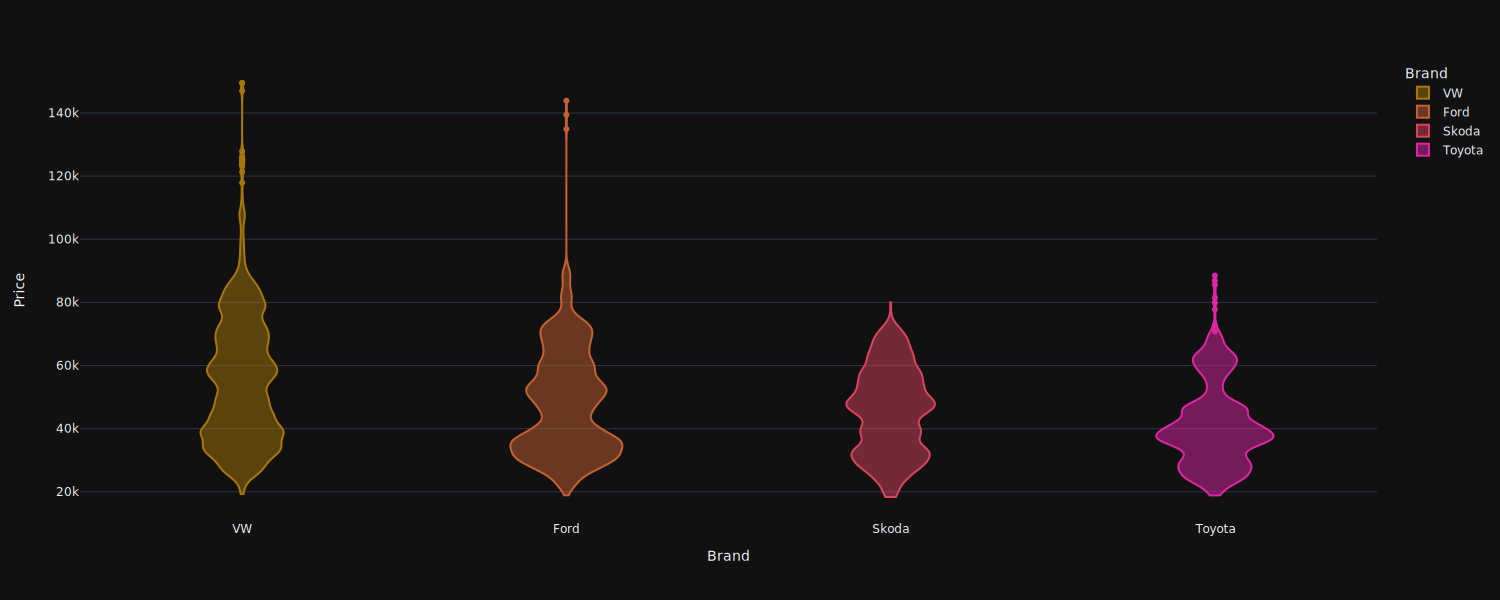

In [24]:
#testing out a different way of excluding brands by using the != operator
fig=px.violin(df[(df.Brand!='Porsche')& (df.Brand!='Mercedes-Benz')& (df.Brand!='BMW')& (df.Brand!='Audi')],'Brand', 'Price', color='Brand', 
color_discrete_sequence=px.colors.cyclical.Phase, template='plotly_dark', width=1500, height=600).update_traces(scalemode='count', bandwidth=2000, spanmode='hard')
fig.show('svg')

Pricing per Region. Are some regions cheaper?

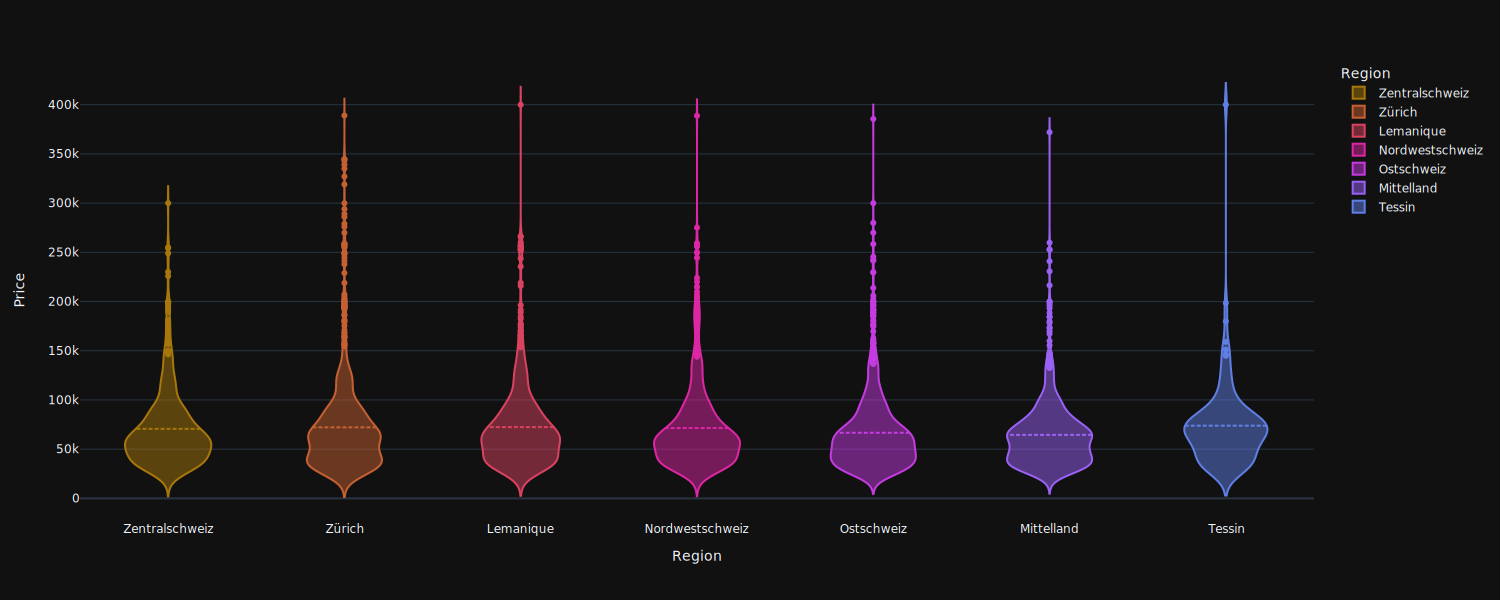

In [50]:
#pricing is different dependent on region as seen below
fig=px.violin(df,'Region', 'Price', color='Region', 
color_discrete_sequence=px.colors.cyclical.Phase, template='plotly_dark', width=1500, height=600).update_traces(meanline_visible=True)
fig.show('svg')

In [51]:
df2 = df.dropna()
regions_data = [df2[df2['Region'] == region]['Price'].values for region in df2['Region'].unique()]
f_stat, p_value_anova = stats.f_oneway(*regions_data)
print(f"Scipy ANOVA: F-statistic = {f_stat:.4f}, P-value = {p_value_anova:.4f}")

# Anova indicates that at least one group is different from the others

Scipy ANOVA: F-statistic = 5.3951, P-value = 0.0000


In [ ]:
# The mean per region is displayed below.
df.groupby('Region').describe()

Price                                                \
                  count          mean           std      min      25%   
Region                                                                  
Lemanique         727.0  72424.382393  43161.859438  20900.0  42900.0   
Mittelland       1019.0  64514.736997  34107.537832  19020.0  40637.5   
Nordwestschweiz   830.0  71452.390361  42913.635525  18700.0  42840.0   
Ostschweiz       1181.0  66644.642676  38919.298619  19200.0  40300.0   
Tessin            115.0  73866.173913  44784.382941  24900.0  47853.0   
Zentralschweiz    679.0  70664.826215  39607.795211  19300.0  44585.0   
Zürich           1200.0  72168.073333  48169.497736  18490.0  40642.5   

                                              
                     50%       75%       max  
Region                                        
Lemanique        62900.0  86317.50  399900.0  
Mittelland       59500.0  76770.00  372000.0  
Nordwestschweiz  60134.5  83159.75  388800.0  
Ostschweiz       58500.0  78400.00  385500.0  
Tessin           67900.0  82650.00  399999.0  
Zentralschweiz   59900.0  84900.00  299992.0  
Zürich           62525.0  85522.50  389000.0